In [19]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Data Files
mouse_metadata = "Resources/Mouse_metadata.csv"
study_results = "Resources/Study_results.csv"

# Read the data
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Merge data into a single dataset
# return and match all rows
merge_data = pd.merge(mouse_metadata, study_results, on ='Mouse ID', how='outer')
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Sort database by Tumor Volume
merge_data_sort = merge_data.sort_values(["Tumor Volume (mm3)"], ascending=True)
merge_data_sort.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


In [11]:
# Summary Statistics
regimen_grouped = merge_data_sort.groupby(["Drug Regimen"])
regimen_grouped

# Create variable to capture total tumor volume for each regimen
tumor_volume = regimen_grouped["Tumor Volume (mm3)"].sum()

# Create median for each regimen
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()

# Create mean for each regimen
regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()

# Create variance for each regimen
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()

# Create Standard Deviation for each regimen
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()

# Create SEM
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()

In [14]:
# Summary Statistics
summary_stats = pd.DataFrame({"Total Tumor Volume": tumor_volume, "Mean": regimen_mean, "Median": regimen_median, "Variance":regimen_variance, "Standard Deviation":regimen_std, "SEM":regimen_sem})

#Format cells
summary_stats["Total Tumor Volume"] = summary_stats["Total Tumor Volume"].astype(float).map("{:,.2f}".format)

summary_stats["Mean"] = summary_stats["Mean"].astype(float).map("{:,.2f}".format)

summary_stats["Median"] = summary_stats["Median"].astype(float).map("{:,.2f}".format)

summary_stats["Variance"] = summary_stats["Variance"].astype(float).map("{:,.2f}".format)

summary_stats["Standard Deviation"] = summary_stats["Standard Deviation"].astype(float).map("{:,.2f}".format)

summary_stats["SEM"] = summary_stats["SEM"].astype(float).map("{:,.2f}".format)
summary_stats

,Total Tumor Volume,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,"9,355.42",40.68,41.56,24.95,4.99,0.33
Ceftamin,"9,361.23",52.59,51.78,39.29,6.27,0.47
Infubinol,"9,413.49",52.88,51.82,43.13,6.57,0.49
Ketapril,"10,384.30",55.24,53.70,68.55,8.28,0.60
Naftisol,"10,105.67",54.33,52.51,66.17,8.13,0.60
Placebo,"9,780.08",54.03,52.29,61.17,7.82,0.58
Propriva,"8,423.93",52.32,50.85,42.35,6.51,0.51
Ramicane,"9,169.42",40.22,40.67,23.49,4.85,0.32
Stelasyn,"9,816.20",54.23,52.43,59.45,7.71,0.57


In [15]:
# Groupby drug regimen
regimen_data_points = merge_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Data Points')

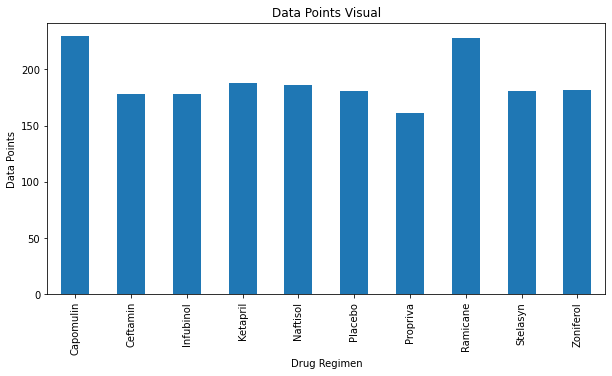

In [34]:
# Create bar plot using pandas
regimen_data_points.plot(kind="bar", figsize=(10,5))

# Chart Title
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")


Text(0, 0.5, 'Data Points')

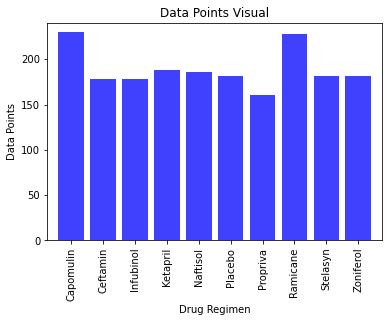

In [21]:
# Create bar plot using pyplot
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

# Set x axis
x_axis = np.arange(len(regimen_data_points))
plt.bar(x_axis, users, color='b', alpha=0.75, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+10)
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

In [23]:
# Group Mouse ID and Gender
groupby_gender = merge_data.groupby(["Mouse ID", "Sex"])
groupby_gender
mouse_gender_df = pd.DataFrame(groupby_gender.size())

# Create DataFrame
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# Percentage
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# Format Percentage
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


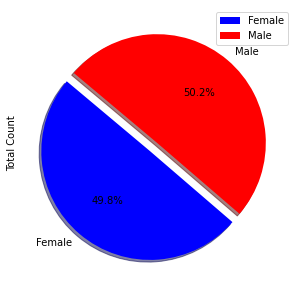

In [24]:
# Pie Plot using pandas
colors = ['blue', 'red']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count', figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow =True, autopct="%1.1f%%")

(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

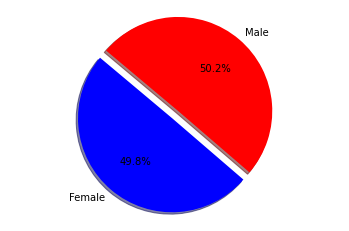

In [16]:
# pie plot using pyplot
labels = ["Female", "Male"]
sizes = [49.799197,50.200803] 
colors = ['blue', 'red']
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

In [25]:
# Calculate Final Tumor Volume
best_regimes = merge_data[merge_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes= best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes
best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
best_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


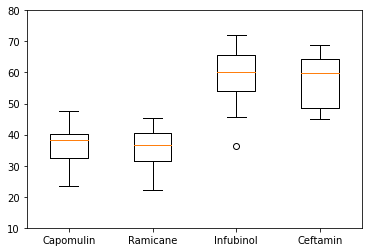

In [27]:
# Calculate Quartiles, Outliers, and Boxplots
best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()
best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df

# Create a list for labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Box plot
final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

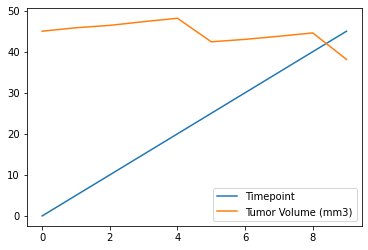

In [30]:
# Line plot
time_vs_tumer = merge_data[merge_data["Mouse ID"].isin(["j119"])]
time_vs_tumer

time_vs_tumer_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumer_data

line_plot_df = time_vs_tumer_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

line_plot_final.plot.line()

In [31]:
tumorvolume_list = line_plot_final['Tumor Volume (mm3)'].tolist()
timepoint_list = line_plot_final['Timepoint'].tolist()

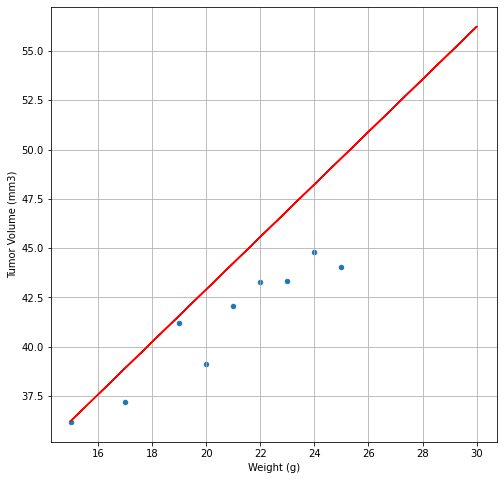

In [41]:
# Scatter plot
capomulin_scatter = merge_data[merge_data["Drug Regimen"].isin(["Capomulin"])]
capomulin_scatter_df = best_regimes[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_scatter_plot = capomulin_scatter.reset_index()
capomulin_sorted = capomulin_scatter_plot.sort_values(["Weight (g)"], ascending=True)
capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()
capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize = (8, 8))

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merge_data["Weight (g)"],merge_data["Tumor Volume (mm3)"])
regress_values = merge_data["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(merge_data["Weight (g)"], regress_values, "r-")
